# Introduction
All tests in this document use sample datasets from UC Irvine's Machine Learning Repository.

# Core Solvers
Core solver times make large contributions to the total runtime. Sklearn is generally faster, but for larger datasets MOSEK catches up in speed and is far more stable.

# Variable Choice Functions
Variable choice functions significantly impact runtime as branching helps find better upper bounds as well helping setup prunable nodes. There is an important balance between how long a variable choice function takes and the pruning rate it can produce. For larger models, slow but deliberate functions might be more effective, while smaller models can function well with fast heuristics.

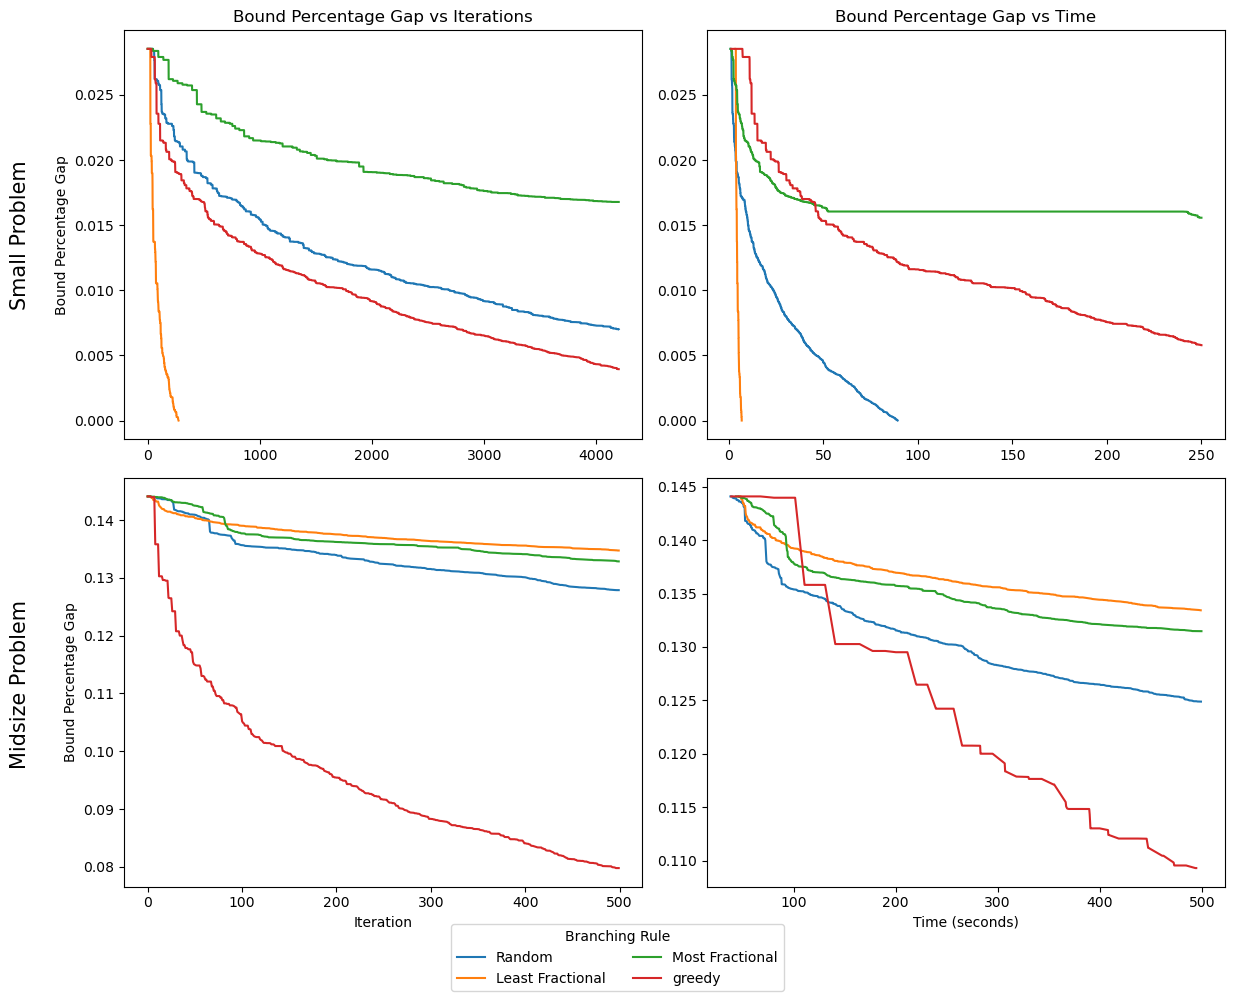

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 10)) 
for i, heuristic in enumerate(("Random", "Least Fractional", "Most Fractional", "greedy")):
    df = pd.read_csv(f"tests/test_data/test_ionosphere_sklearn_sklearn_{heuristic}_backwardSelection_24.csv")
    df_0 = df[df['iteration'] < 4200]
    df_1 = df[df['time'] < 250]
    ax[0,0].plot(df_0['iteration'], (df_0['UB'] - df_0['LB'])/df_0['LB'], label=heuristic)
    ax[0,1].plot(df_1['time'], (df_1['UB'] - df_1['LB'])/df_1['LB'], label=heuristic)
    df = pd.read_csv(f"tests/test_data/test_MYOCARDIAL_MOSEK_{heuristic}_Forward Stepwise Regression No Penalty_4.csv")
    df_0 = df[df['iteration'] < 500]
    df_1 = df[df['time'] < 500]
    ax[1,0].plot(df_0['iteration'], (df_0['UB'] - df_0['LB'])/df_0['LB'], label=heuristic)
    ax[1,1].plot(df_1['time'], (df_1['UB'] - df_1['LB'])/df_1['LB'], label=heuristic)
ax[0,0].set_ylabel("Bound Percentage Gap")
ax[1,0].set_ylabel("Bound Percentage Gap")
ax[0,0].set_title("Bound Percentage Gap vs Iterations")
ax[0,1].set_title("Bound Percentage Gap vs Time")
fig.text(-0.025, 0.76, 'Small Problem', va='center', rotation='vertical', fontsize=15)
fig.text(-0.025, 0.31, 'Midsize Problem', va='center', rotation='vertical', fontsize=15)
ax[1,0].set_xlabel("Iteration")
ax[1,1].set_xlabel("Time (seconds)")
fig.legend(("Random", "Least Fractional", "Most Fractional", "greedy"), loc='lower center', ncol=2, title="Branching Rule")
plt.tight_layout(rect=[0, 0.05, 1, 1])  # leave space at bottom for legend
plt.show()

# Initial Upper Bound Heuristics
Initial upper bound heuristics help with early pruning by ensuring a feasible solution to compare with.

# Parallel Branching
Our initial implementation shows rather severely diminishing returns. That indicates either a limitation with the central manager, or a limitation with the processor. Further testing and optimization will be necessary.

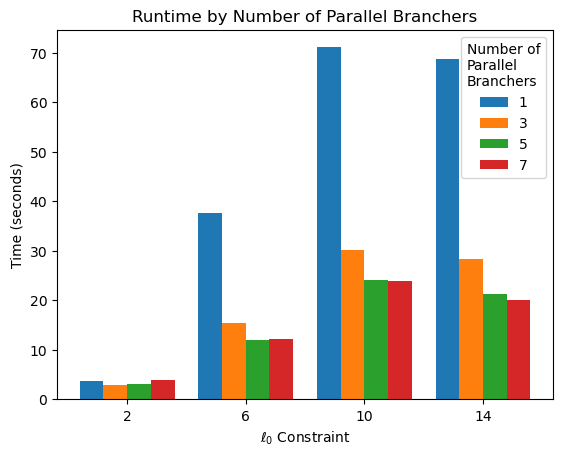

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
fig,ax = plt.subplots()
k_vals = [2,6,10,14]
j_vals = [1,3,5,7]
times = np.zeros((len(j_vals), len(k_vals)))
for j in range(len(j_vals)):
    for k in range(len(k_vals)):
        times[j,k] = pd.read_csv(f"tests/test_data/test_parallel{j_vals[j]}_IONOSPHERE_MOSEK_Least Fractional_No Heuristic_{k_vals[k]}.csv")["time"].max()
offsets = np.arange(-(len(j_vals)-1)/2, (len(j_vals)+1)/2) * 0.2
for i in range(len(j_vals)):
    ax.bar(np.arange(len(k_vals)) + offsets[i], times[i], 0.2, label=j_vals[i])
# Labels & formatting
ax.set_xticks(np.arange(len(k_vals)))
ax.set_xticklabels(k_vals)
ax.set_ylabel('Time (seconds)')
ax.set_xlabel(r"$\ell_0$ Constraint")
ax.set_title('Runtime by Number of Parallel Branchers')
ax.legend(title="Number of\nParallel\nBranchers")
plt.show()